In [14]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text

In [15]:
team_color = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LAR':'#002147','LAC':'#2072BA',
          'MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C','NYJ':'#203731',
          'LV':'#C4C9CC','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

In [16]:
import_data = nfl.import_seasonal_data([2022])             
rb_season_data = pd.DataFrame(index = import_data.index)
rb_season_data["Player ID"] = import_data["player_id"]
rb_season_data["Carries"] = import_data["carries"]
rb_season_data["Rushing Yards"] = import_data["rushing_yards"]
rb_season_data["Rushing TDs"] = import_data["rushing_tds"]
rb_season_data["Fumbles"] = import_data["rushing_fumbles"]
rb_season_data["Fumbles Lost"] = import_data["rushing_fumbles_lost"]
rb_season_data["Rushing 1st Downs"] = import_data["rushing_first_downs"]
rb_season_data["Rushing EPA"] = import_data["rushing_epa"]
rb_season_data["Rushing 2Pt Conversions"] = import_data["rushing_2pt_conversions"]
rb_season_data["Games Played"] = import_data["games"]
rb_season_data

,Player ID,Carries,Rushing Yards,Rushing TDs,Fumbles,Fumbles Lost,Rushing 1st Downs,Rushing EPA,Rushing 2Pt Conversions,Games Played
0,00-0019596,18,-8.0,0,1.0,1.0,0.0,-17.535978,0,10
1,00-0023459,16,64.0,0,2.0,2.0,5.0,-5.732299,0,11
2,00-0024243,0,0.0,0,0.0,0.0,0.0,0.000000,0,3
3,00-0026143,16,49.0,1,2.0,1.0,5.0,-4.190241,0,8
4,00-0026158,3,6.0,0,0.0,0.0,1.0,-0.136921,0,3
...,...,...,...,...,...,...,...,...,...,...
531,00-0038120,80,463.0,4,0.0,0.0,20.0,13.889110,0,7
532,00-0038124,4,22.0,1,0.0,0.0,1.0,1.221357,0,8
533,00-0038128,18,64.0,0,2.0,2.0,2.0,-13.137970,0,4
534,00-0038129,0,0.0,0,0.0,0.0,0.0,0.000000,0,8


In [17]:
import_weekly_data = nfl.import_weekly_data([2022])             
rb_data = pd.DataFrame(index = import_weekly_data.index)
rb_data["Player"] = import_weekly_data["player_name"]
rb_data["Player ID"] = import_weekly_data["player_id"]
rb_data["Team"] = import_weekly_data["recent_team"]
rb_data["Player Full Name"] = import_weekly_data["player_display_name"]
rb_data = rb_data.drop_duplicates(subset=['Player Full Name'])
rb_data.loc[rb_data["Team"] == "LA", "Team"] = "LAR"

Downcasting floats.


In [18]:
rb_merged_season_data = rb_data.merge(rb_season_data, left_on='Player ID', right_on='Player ID')
rb_merged_season_data = rb_merged_season_data.loc[rb_merged_season_data["Carries"] > 50, :]
rb_merged_season_data = rb_merged_season_data.drop(columns=["Player ID"])
rb_merged_season_data.sort_values(by=['Team'])

,Player,Team,Player Full Name,Carries,Rushing Yards,Rushing TDs,Fumbles,Fumbles Lost,Rushing 1st Downs,Rushing EPA,Rushing 2Pt Conversions,Games Played
373,E.Benjamin,ARI,Eno Benjamin,70,299.0,2,0.0,0.0,14.0,0.681590,1,9
257,K.Murray,ARI,Kyler Murray,59,359.0,2,4.0,2.0,19.0,7.855257,1,9
142,J.Conner,ARI,James Conner,82,314.0,3,1.0,0.0,23.0,-0.424279,0,7
476,T.Allgeier,ATL,Tyler Allgeier,102,443.0,1,0.0,0.0,20.0,-5.716605,0,9
39,C.Patterson,ATL,Cordarrelle Patterson,76,402.0,5,0.0,0.0,23.0,7.072762,0,6
87,M.Mariota,ATL,Marcus Mariota,63,347.0,3,4.0,2.0,23.0,8.527684,0,10
420,C.Huntley,ATL,Caleb Huntley,69,331.0,1,1.0,0.0,17.0,4.894220,0,8
224,L.Jackson,BAL,Lamar Jackson,86,635.0,2,1.0,0.0,38.0,35.474704,0,9
120,K.Drake,BAL,Kenyan Drake,73,344.0,3,0.0,0.0,16.0,-5.319888,0,7
261,D.Singletary,BUF,Devin Singletary,92,394.0,2,2.0,2.0,17.0,-19.663987,0,9


In [19]:
rb_data_ngs = pd.read_csv("../Resources/ngs_2022_rushing.csv")
rb_data_ngs = rb_data_ngs.loc[rb_data_ngs["week"] == 0, :]
rb_data_ngs = rb_data_ngs.sort_values(by=['team_abbr'])
rb_data_ngs = rb_data_ngs.drop_duplicates(subset=['player_display_name'])
rb_data_full = rb_data_ngs.merge(rb_merged_season_data, left_on='player_display_name', right_on='Player Full Name')
rb_data_full = rb_data_full.drop(columns = ["season", "season_type", "player_first_name", "player_last_name",
                                            "player_jersey_number", "Player Full Name", "Team", "Carries",
                                           "Rushing Yards", "Rushing TDs", "week"])
rb_data_full.columns

Index(['player_display_name', 'player_position', 'team_abbr', 'efficiency',
       'percent_attempts_gte_eight_defenders', 'avg_time_to_los',
       'rush_attempts', 'rush_yards', 'expected_rush_yards',
       'rush_yards_over_expected', 'avg_rush_yards',
       'rush_yards_over_expected_per_att', 'rush_pct_over_expected',
       'rush_touchdowns', 'player_gsis_id', 'player_short_name', 'Player',
       'Fumbles', 'Fumbles Lost', 'Rushing 1st Downs', 'Rushing EPA',
       'Rushing 2Pt Conversions', 'Games Played'],
      dtype='object')

In [20]:
rb_data_full

,player_display_name,player_position,team_abbr,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,...,rush_touchdowns,player_gsis_id,player_short_name,Player,Fumbles,Fumbles Lost,Rushing 1st Downs,Rushing EPA,Rushing 2Pt Conversions,Games Played
0,Eno Benjamin,RB,ARI,3.866020,8.571429,2.919274,70,299,289.920019,-2.920019,...,2,00-0036383,E.Benjamin,E.Benjamin,0.0,0.0,14.0,0.681590,1,9
1,James Conner,RB,ARI,4.034363,10.975610,2.644623,82,314,327.154433,-16.154433,...,3,00-0033553,J.Conner,J.Conner,1.0,0.0,23.0,-0.424279,0,7
2,Cordarrelle Patterson,RB,ATL,3.541866,26.315789,2.803507,76,402,333.762912,64.237088,...,5,00-0030578,C.Patterson,C.Patterson,0.0,0.0,23.0,7.072762,0,6
3,Caleb Huntley,RB,ATL,3.574834,34.782609,2.830828,69,331,254.408296,76.591704,...,1,00-0036829,C.Huntley,C.Huntley,1.0,0.0,17.0,4.894220,0,8
4,Tyler Allgeier,RB,ATL,3.950135,32.352941,2.886135,102,443,339.248998,60.751002,...,1,00-0037263,T.Allgeier,T.Allgeier,0.0,0.0,20.0,-5.716605,0,9
5,Kenyan Drake,RB,BAL,3.812151,38.356164,2.987129,73,344,264.438909,73.561091,...,3,00-0033118,K.Drake,K.Drake,0.0,0.0,16.0,-5.319888,0,7
6,Devin Singletary,RB,BUF,3.544365,13.043478,2.774228,92,394,390.389305,-26.389305,...,2,00-0035250,D.Singletary,D.Singletary,2.0,2.0,17.0,-19.663987,0,9
7,D'Onta Foreman,RB,CAR,3.138991,30.769231,2.615904,91,426,338.307256,64.692744,...,4,00-0033925,D.Foreman,D.Foreman,0.0,0.0,20.0,4.076606,1,9
8,David Montgomery,RB,CHI,4.292811,27.826087,2.852963,115,434,430.126515,-3.126515,...,2,00-0035685,D.Montgomery,D.Montgomery,0.0,0.0,22.0,-9.747717,0,9
9,Khalil Herbert,RB,CHI,3.123748,25.000000,2.838596,108,643,433.754958,204.245042,...,4,00-0036906,K.Herbert,K.Herbert,0.0,0.0,22.0,3.694510,0,10


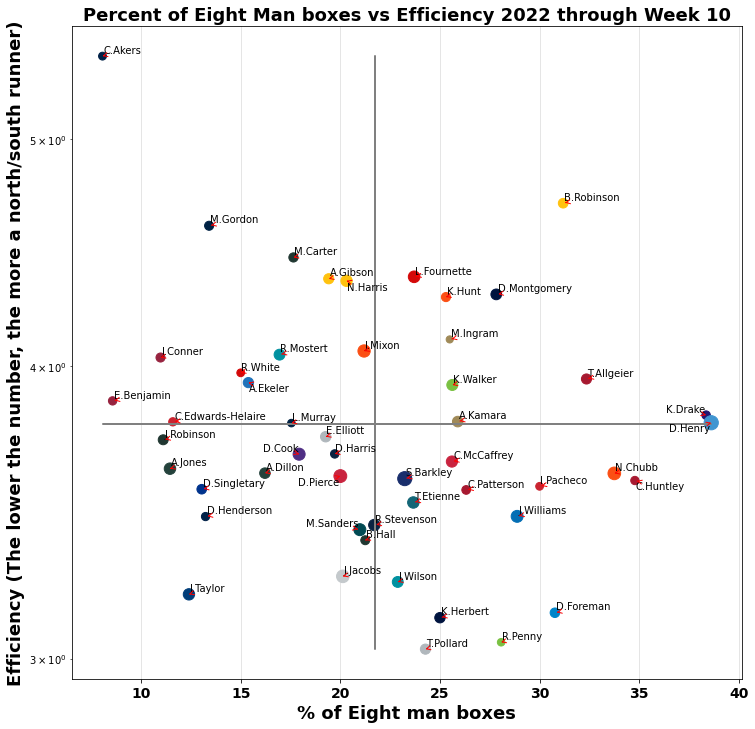

In [21]:
rb_graph = rb_data_full[["player_short_name", "percent_attempts_gte_eight_defenders", "efficiency", "team_abbr",
                         "rush_attempts"]]

x = rb_graph["percent_attempts_gte_eight_defenders"]
y = rb_graph["efficiency"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in rb_graph["team_abbr"]:
    color.append(team_color[team])

size = rb_graph["rush_attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% of Eight man boxes', fontsize=18, fontweight = "bold")
plt.ylabel('Efficiency (The lower the number, the more a north/south runner)', fontsize=18, fontweight = "bold")
plt.yscale('log')
plt.title('Percent of Eight Man boxes vs Efficiency 2022 through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(rb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

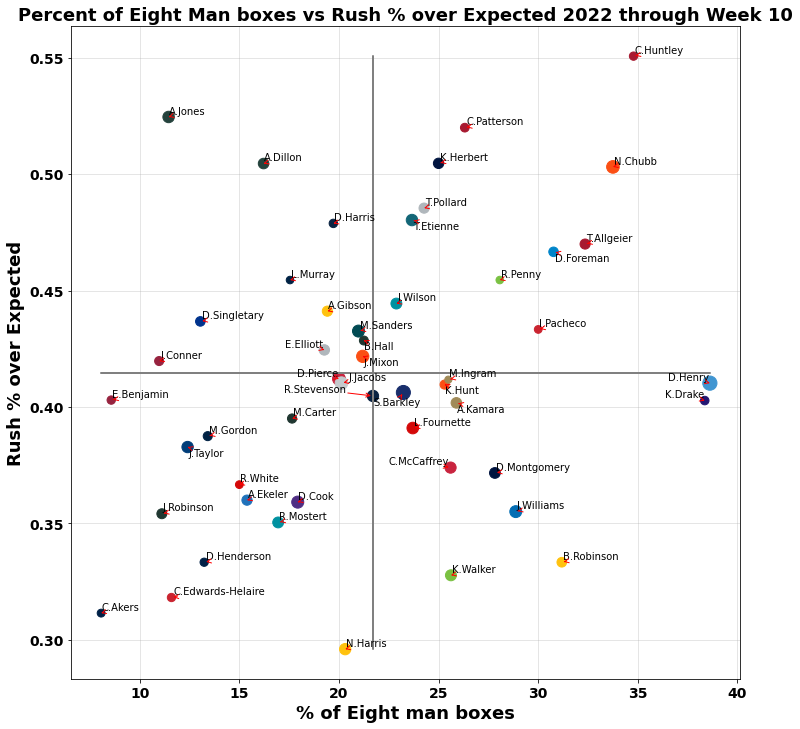

In [22]:
rb_graph = rb_data_full[["player_short_name", "percent_attempts_gte_eight_defenders", "rush_pct_over_expected",
                         "team_abbr", "rush_attempts"]]

x = rb_graph["percent_attempts_gte_eight_defenders"]
y = rb_graph["rush_pct_over_expected"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in rb_graph["team_abbr"]:
    color.append(team_color[team])

size = rb_graph["rush_attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% of Eight man boxes', fontsize=18, fontweight = "bold")
plt.ylabel('Rush % over Expected', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Percent of Eight Man boxes vs Rush % over Expected 2022 through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(rb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

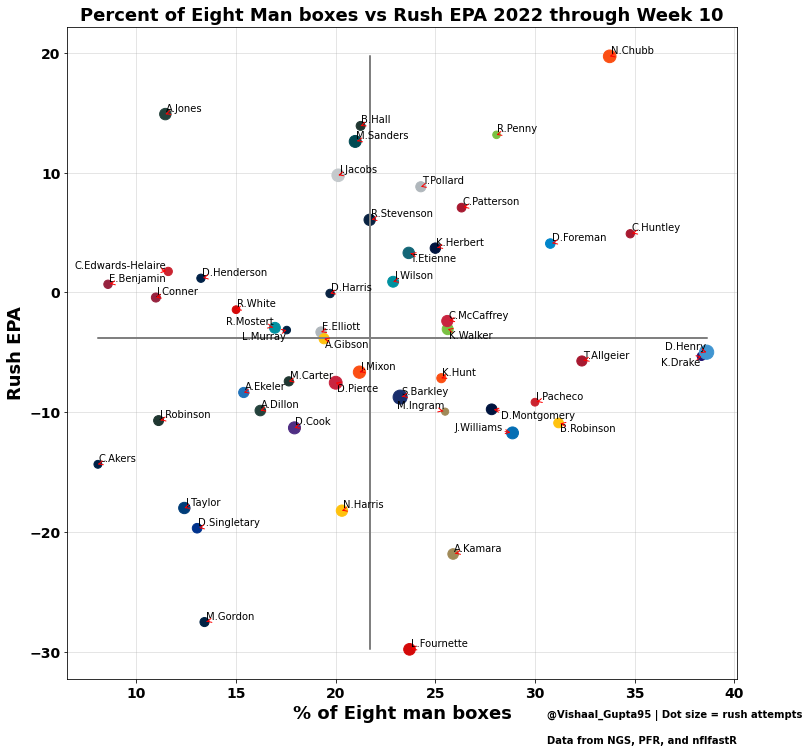

In [27]:
rb_graph = rb_data_full[["player_short_name", "percent_attempts_gte_eight_defenders", "Rushing EPA",
                         "team_abbr", "rush_attempts"]]

x = rb_graph["percent_attempts_gte_eight_defenders"]
y = rb_graph["Rushing EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in rb_graph["team_abbr"]:
    color.append(team_color[team])

size = rb_graph["rush_attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('% of Eight man boxes', fontsize=18, fontweight = "bold")
plt.ylabel('Rush EPA', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Percent of Eight Man boxes vs Rush EPA 2022 through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(rb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.figtext(.68, .08, '@Vishaal_Gupta95 | Dot size = rush attempts', fontsize=10, fontweight = "bold")
plt.figtext(.68, .05, 'Data from NGS, PFR, and nflfastR', fontsize=10, fontweight = "bold")

#plt.savefig('Images/Per8Man_vs_RushEPA', dpi=400)
plt.show()

In [24]:
rb_data_pfr = pd.read_csv("../Resources/advstats_season_rush.csv")
rb_data_pfr = rb_data_pfr.loc[rb_data_pfr["season"] == 2022, :]
rb_data_pfr = rb_data_pfr.drop(columns=["season", "tm", "pfr_id", "age", "pos", "gs", "att", "yds",
                                       "x1d", "loaded"])
rb_data_pfr.loc[rb_data_pfr["player"] == "AJ Dillon", "player"] = "A.J. Dillon"
rb_data_pfr.loc[rb_data_pfr["player"] == "Jeff Wilson", "player"] = "Jeffery Wilson"
rb_data_all = rb_data_full.merge(rb_data_pfr, left_on='player_display_name', right_on='player')
rb_data_all.columns

Index(['player_display_name', 'player_position', 'team_abbr', 'efficiency',
       'percent_attempts_gte_eight_defenders', 'avg_time_to_los',
       'rush_attempts', 'rush_yards', 'expected_rush_yards',
       'rush_yards_over_expected', 'avg_rush_yards',
       'rush_yards_over_expected_per_att', 'rush_pct_over_expected',
       'rush_touchdowns', 'player_gsis_id', 'player_short_name', 'Player',
       'Fumbles', 'Fumbles Lost', 'Rushing 1st Downs', 'Rushing EPA',
       'Rushing 2Pt Conversions', 'Games Played', 'player', 'g', 'ybc',
       'ybc_att', 'yac', 'yac_att', 'brk_tkl', 'att_br', 'td'],
      dtype='object')

In [25]:
rb_data_all

,player_display_name,player_position,team_abbr,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,...,Games Played,player,g,ybc,ybc_att,yac,yac_att,brk_tkl,att_br,td
0,Eno Benjamin,RB,ARI,3.866020,8.571429,2.919274,70,299,289.920019,-2.920019,...,9,Eno Benjamin,10,150,2.1,149,2.1,7,10.0,2.0
1,James Conner,RB,ARI,4.034363,10.975610,2.644623,82,314,327.154433,-16.154433,...,7,James Conner,7,175,2.1,139,1.7,1,82.0,3.0
2,Cordarrelle Patterson,RB,ATL,3.541866,26.315789,2.803507,76,402,333.762912,64.237088,...,6,Cordarrelle Patterson,6,254,3.3,148,1.9,0,NaN,5.0
3,Caleb Huntley,RB,ATL,3.574834,34.782609,2.830828,69,331,254.408296,76.591704,...,8,Caleb Huntley,8,192,2.8,139,2.0,0,NaN,1.0
4,Tyler Allgeier,RB,ATL,3.950135,32.352941,2.886135,102,443,339.248998,60.751002,...,9,Tyler Allgeier,9,260,2.5,183,1.8,1,102.0,1.0
5,Kenyan Drake,RB,BAL,3.812151,38.356164,2.987129,73,344,264.438909,73.561091,...,7,Kenyan Drake,7,245,3.4,99,1.4,0,NaN,3.0
6,Devin Singletary,RB,BUF,3.544365,13.043478,2.774228,92,394,390.389305,-26.389305,...,9,Devin Singletary,9,279,3.0,115,1.3,2,46.0,2.0
7,D'Onta Foreman,RB,CAR,3.138991,30.769231,2.615904,91,426,338.307256,64.692744,...,9,D'Onta Foreman,10,241,2.6,185,2.0,4,22.8,4.0
8,David Montgomery,RB,CHI,4.292811,27.826087,2.852963,115,434,430.126515,-3.126515,...,9,David Montgomery,9,180,1.6,254,2.2,13,8.8,2.0
9,Khalil Herbert,RB,CHI,3.123748,25.000000,2.838596,108,643,433.754958,204.245042,...,10,Khalil Herbert,10,376,3.5,267,2.5,7,15.4,4.0


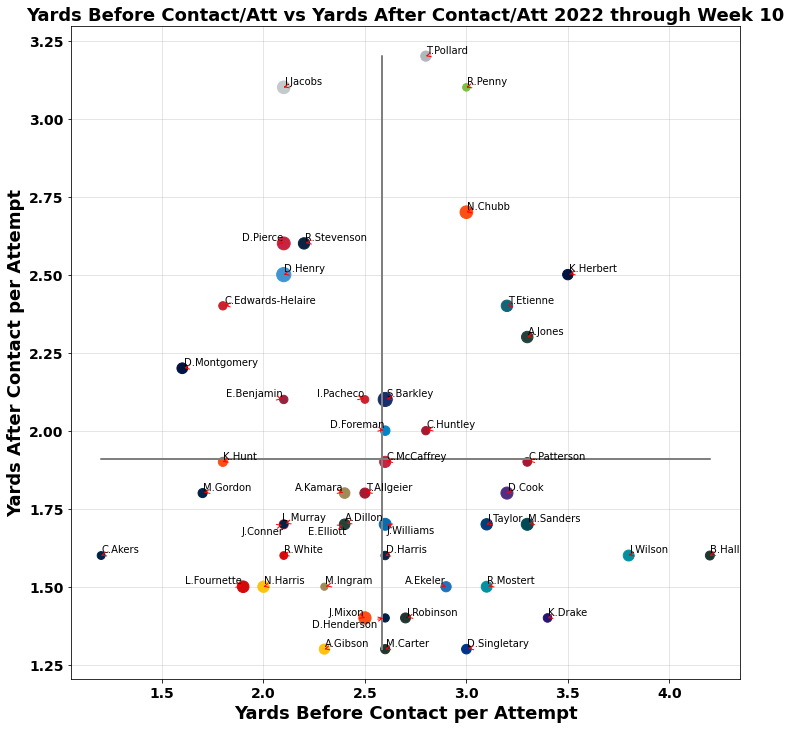

In [26]:
rb_graph = rb_data_all[["player_short_name", "ybc_att", "yac_att", "team_abbr", "rush_attempts"]]

x = rb_graph["ybc_att"]
y = rb_graph["yac_att"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in rb_graph["team_abbr"]:
    color.append(team_color[team])

size = rb_graph["rush_attempts"].to_numpy()
s = [s for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Yards Before Contact per Attempt', fontsize=18, fontweight = "bold")
plt.ylabel('Yards After Contact per Attempt', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Yards Before Contact/Att vs Yards After Contact/Att 2022 through Week 10', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(rb_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgYBC_vs_AvgYAC', dpi=400)
plt.show()